# Escenarios de Aplicación de la Ciencia de Datos en la AgroIndustria.


## Escenario 1: Diseño de un chocolate

Trabajas para un importante productor de dulces y su objetivo es redactar un informe que su empresa pueda utilizar para guiar el diseño de su próximo producto. Poco después de comenzar tu investigación, te topas con este conjunto de datos muy intersante que contiene los resultados de una encuesta para conocer los dulces favoritos.

### Importamos las bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Requerimientos listos')

Requerimientos listos


### Leemos los datos de dulces. Id será el index.

In [3]:
candy_filepath='./datasets/candy.csv'
candy_data = pd.read_csv(candy_filepath, index_col='id')

### Exploramos los datos

Utilizaremos un comando de Python para imprimir las primeras cinco filas de los datos

In [4]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


El conjunto de datos contiene 83 filas, donde cada una corresponde a una barra de chocolate diferente. Hay 13 diferentes columnas:

* **'competitorname'** contiene el nombre de la barra de chocolate, las siguientes 9 columnas (de chocolate a pluribus) describen el caramelo. Por ejemplo, las filas con caramelos de chocolate tienen un "Sí" en la columna chocolate (y los caramelos sin chocolate tienen un "No" en la misma columna)
* El **'sugar percent'** proporciona alguna indicación de la cantidad de azúcar, donde los valores más altos significan un mayor contenido de azúcar.
* **'pricepercent'** muestra el precio por unidad
* **'winpercent'** se calcula a partir de los resultados de la encuesta, donde los valores más altos, indican que el dulce es mas popular.

¿La gente tiende a preferir caramelos con mayor cantidad de azucar?

Crearemos un diagrama de dispersión que muestre la relación entre 'porcentaje de azucar' (eje x) y winpercent (eje y)


<Axes: xlabel='pricepercent', ylabel='winpercent'>

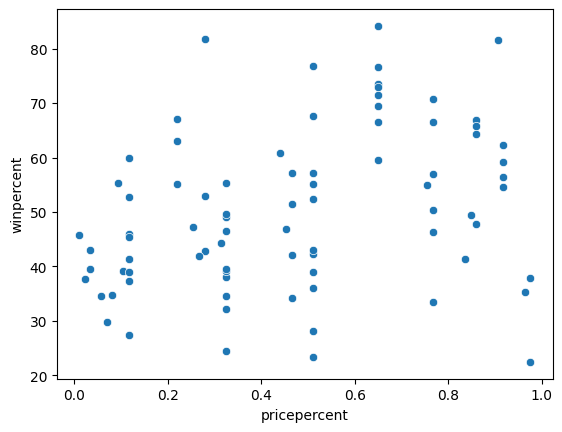

In [5]:
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'])

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

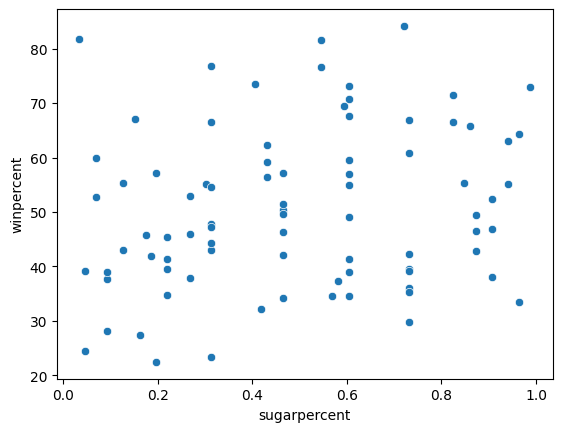

In [6]:
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

¿El diagrama muestra una fuerte correlación entre las dos variables? de ser así ¿Los dulces más azucarados son relativamente más o menos populares?

Ahora lo analizaremos con una regresión lineal

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

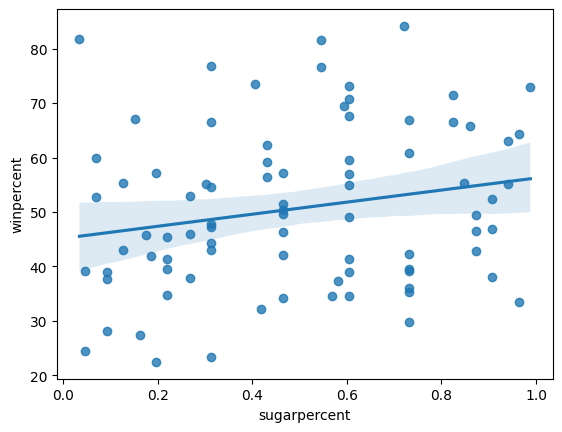

In [7]:
sns.regplot(x=candy_data['sugarpercent'],  y=candy_data['winpercent'])

Crearemos un diagrama de dispersion para mostrar la relación entre 'pricepercent'(x) y 'winpercent' (y) Utilizaremos una columna para codificar con colores los puntos

<Axes: xlabel='pricepercent', ylabel='winpercent'>

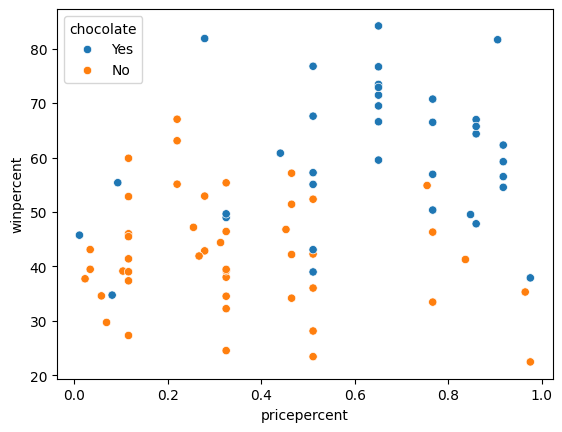

In [8]:
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

### Investigación:

Crearemos el mismo diagrama de dispersión y utilizaremos 2 regresiones lineales donde una serán dulces con chocolate y la segunda será de dulces sin chocolate

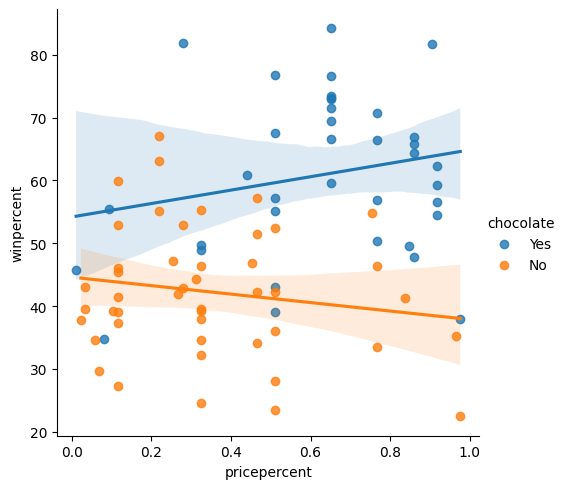

In [9]:
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)

Todo el mundo ama el chocolate.

Crear un diagrama de dispersión para resaltar la relación entre 'chocolate' y 'winpercent'.

<Axes: xlabel='chocolate', ylabel='winpercent'>

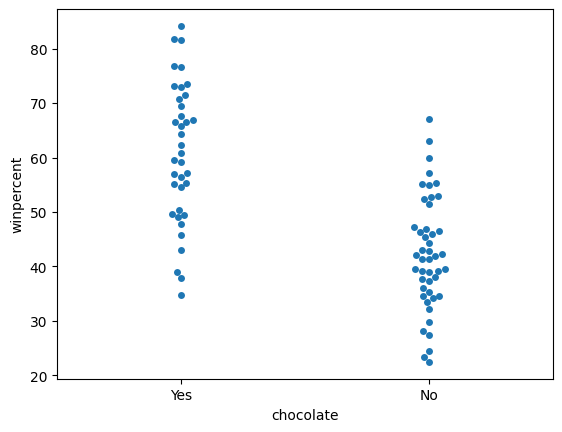

In [10]:
sns.swarmplot(x='chocolate', y='winpercent', data=candy_data)

## Escenario 2: Cáncer de máma

Trabajarás con un conjunto de datos del mundo real que contienen información recopilada de imágenes micróscopicas de tumores de cáncer de mama.


Cada tumor del dataset, ha sido etiquetado como benigno (no canceroso) o maligno(canceroso)

Para obtener más información sobre como se utiliza este tipo de datos para crear algoritmos inteligentes para clasificar tumores en entornos médicos, te comparto el [siguiente video](https://www.youtube.com/watch?v=9Mz84cwVmS0)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Entorno listo')

Entorno listo


Definimos nuestros datasets

+ Cancer_b_data tumores benignos

+ Cancer_m_data tumores malignos

In [13]:
cancer_b_data_filepath = './datasets/cancer_b.csv'
cancer_m_data_filepath = './datasets/cancer_m.csv'

cancer_b_data = pd.read_csv(cancer_b_data_filepath, index_col='Id')
cancer_m_data = pd.read_csv(cancer_m_data_filepath, index_col='Id')

Exploramos los datos Imprimos las primeras 5 filas de los datos de tumores benignos

In [14]:
cancer_b_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [15]:
cancer_m_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


En ambos conjuntos de datos, cada fila corresponde a una imagen distinta. Cada conjunto tiene 31 columnas correspondientes a:

1 columna "Diagnostico" que clasifica a los tumores como benignos (aparecen como b o m) 30 columnas que contienen diferentes medidas obtenidas de las imágenes.

Investigamos las diferencias Crearemos 2 histogramas que muestren la distribucion de los valores 'Area' para los tumores b y m Esto en una sola figura.

<ipython-input-16-149e35134371>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=cancer_b_data['Area (mean)'], label='Tumor Benigno', kde=False)
<ipython-input-16-149e35134371>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=cancer_m_data['Area (mean)'], label='Tumor Maligno', kde=False)


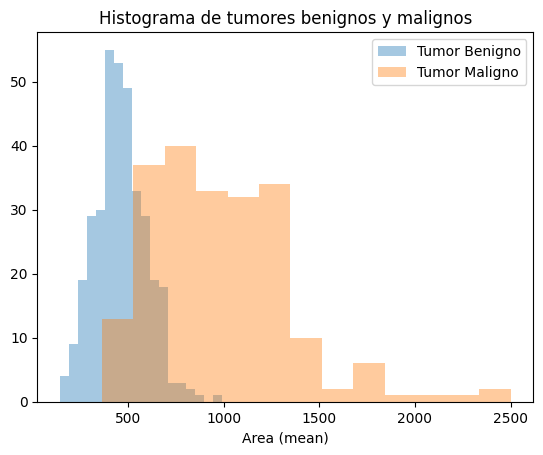

In [16]:
sns.distplot(a=cancer_b_data['Area (mean)'], label='Tumor Benigno', kde=False)

sns.distplot(a=cancer_m_data['Area (mean)'], label='Tumor Maligno', kde=False)

plt.title('Histograma de tumores benignos y malignos')
plt.legend()

<ipython-input-17-c61ea9c855a9>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cancer_b_data['Radius (worst)'], shade=True, label='Benign Tumor')
<ipython-input-17-c61ea9c855a9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cancer_m_data['Radius (worst)'], shade=True, label='Malign Tumor')


<Axes: title={'center': 'Gráfica KDE para tumores benignos y malignos'}, xlabel='Radius (worst)', ylabel='Density'>

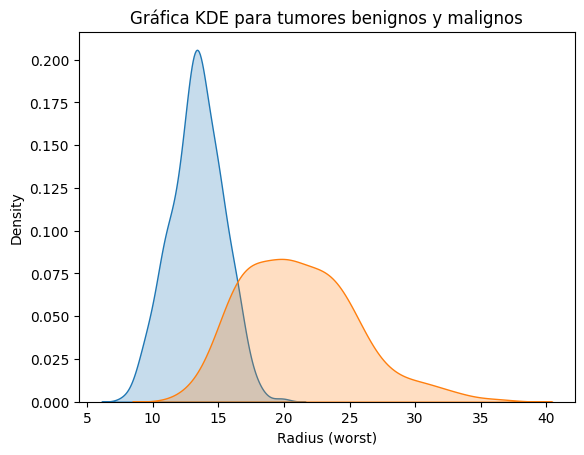

In [17]:
plt.title('Gráfica KDE para tumores benignos y malignos')

sns.kdeplot(data=cancer_b_data['Radius (worst)'], shade=True, label='Benign Tumor')

sns.kdeplot(data=cancer_m_data['Radius (worst)'], shade=True, label='Malign Tumor')

SIA - 2024

Universidad Autónoma de Chapingo.

Material desarrollado por: Ing. Fernanda Ochoa.

Redes:

+ GitHub: [FernandaOchoa](https://github.com/FernandaOchoa)
+ Twitter: [@imonsh](https://twitter.com/imonsh)
+ Instagram: [fherz8a](https://www.instagram.com/fherz8a/)